In [28]:
import os
import shutil
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split


In [29]:
# Paths to dataset folders
base_dir = r"C:\Users\91971\plant_Leaf_disease_data"
train_dir = os.path.join(base_dir, "train/images")
val_dir = os.path.join(base_dir, "valid/images")
test_dir = os.path.join(base_dir, "test/images")

In [30]:
# Prepare dataset (Mapping image names to classes)
def prepare_data(images_dir):
    data = []
    for img_name in os.listdir(images_dir):
        if img_name.startswith("bs"):
            label = 0  # Black Spot
        elif img_name.startswith("pm"):
            label = 1  # Powdery Mildew
        else:
            continue
        data.append((os.path.join(images_dir, img_name), label))
    return data

train_data = prepare_data(train_dir)
val_data = prepare_data(val_dir)
test_data = prepare_data(test_dir)


In [31]:
# Load images and labels
def load_data(data):
    images, labels = [], []
    for img_path, label in data:
        img = tf.keras.preprocessing.image.load_img(img_path, target_size=(128, 128))
        img_array = tf.keras.preprocessing.image.img_to_array(img) / 255.0  # Normalize
        images.append(img_array)
        labels.append(label)
    return tf.convert_to_tensor(images), tf.convert_to_tensor(labels)


In [32]:
x_train, y_train = load_data(train_data)
x_val, y_val = load_data(val_data)
x_test, y_test = load_data(test_data)

In [33]:
# Display a batch of 8 sample images with their labels
def display_sample_images(images, labels, class_names, num_samples=8):
    plt.figure(figsize=(15, 10))
    for i in range(num_samples):
        plt.subplot(2, 4, i + 1)
        plt.imshow(images[i])
        plt.title(f"Label: {class_names[labels[i].numpy()]}")
        plt.axis('off')
    plt.tight_layout()
    plt.show()


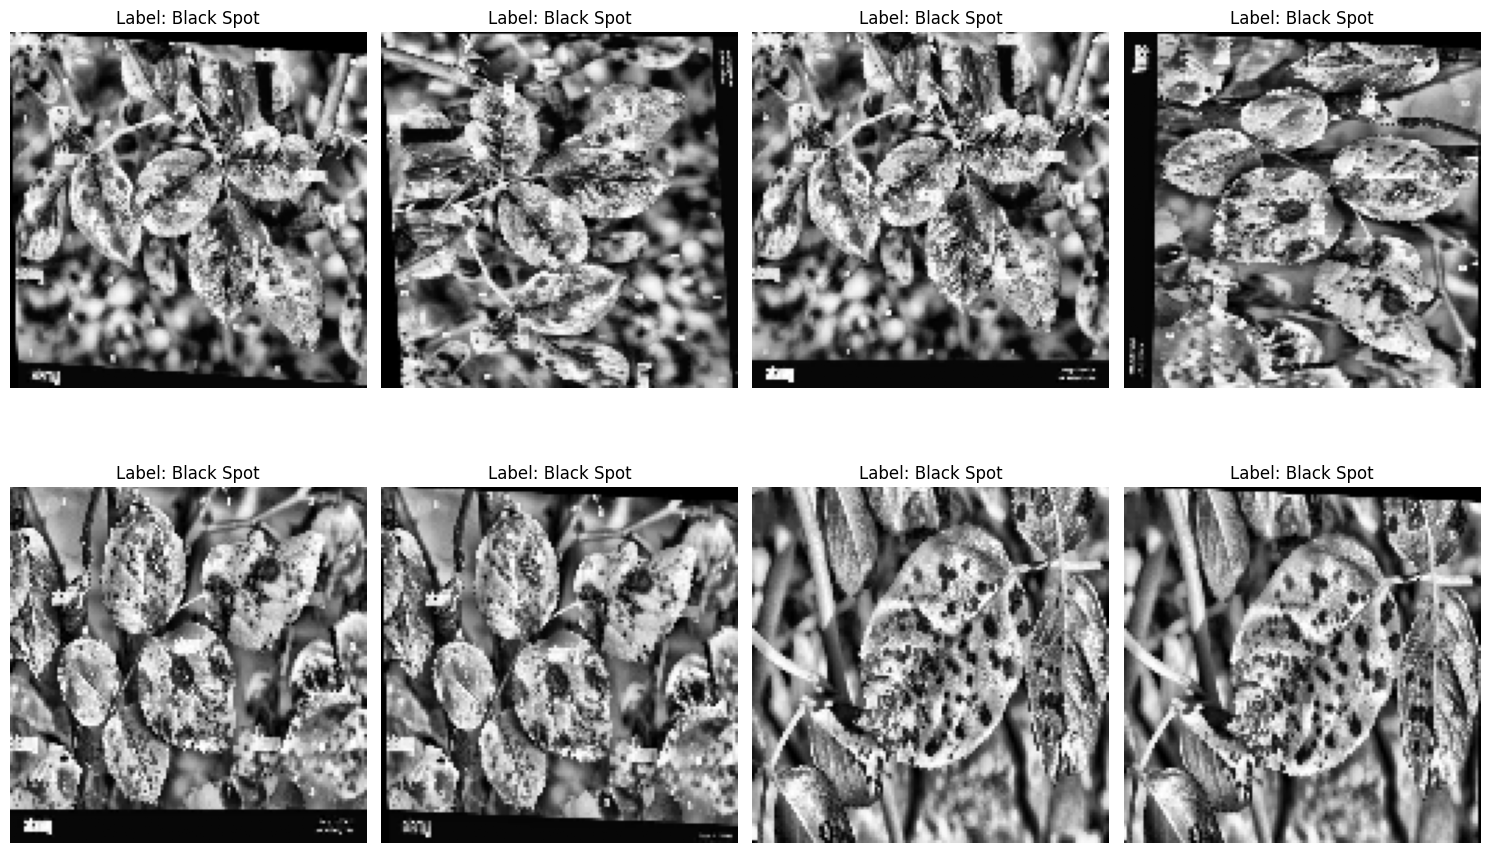

In [34]:
# Class names for labels
class_names = ["Black Spot", "Powdery Mildew"]
display_sample_images(x_train[:8], y_train[:8], class_names)

In [35]:
# Build CNN Model
model = Sequential([
    Conv2D(128, (3, 3), activation='relu', input_shape=(128, 128, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(32, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(2, activation='softmax')  # 2 classes
])


C:\Users\91971\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [36]:
# Compile the model
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

In [37]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)                    │ (None, 126, 126, 128)       │           3,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 63, 63, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 61, 61, 64)          │          73,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 30, 30, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 28, 28, 32)          │          18,464 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 14, 14, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 6272)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 128)                 │         802,944 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 2)                   │             258 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 899,042 (3.43 MB)

 Trainable params: 899,042 (3.43 MB)

 Non-trainable params: 0 (0.00 B)

In [38]:
# Train the model
history = model.fit(
    x_train, y_train,
    epochs=15,
    validation_data=(x_val, y_val),
    batch_size=32
)

Epoch 1/15
11/11 ━━━━━━━━━━━━━━━━━━━━ 20s 2s/step - accuracy: 0.7196 - loss: 0.7459 - val_accuracy: 0.7333 - val_loss: 0.5996
Epoch 2/15
11/11 ━━━━━━━━━━━━━━━━━━━━ 16s 1s/step - accuracy: 0.7138 - loss: 0.6171 - val_accuracy: 0.7333 - val_loss: 0.6081
Epoch 3/15
11/11 ━━━━━━━━━━━━━━━━━━━━ 21s 1s/step - accuracy: 0.7114 - loss: 0.6194 - val_accuracy: 0.7333 - val_loss: 0.5928
Epoch 4/15
11/11 ━━━━━━━━━━━━━━━━━━━━ 16s 1s/step - accuracy: 0.7301 - loss: 0.6077 - val_accuracy: 0.7333 - val_loss: 0.7322
Epoch 5/15
11/11 ━━━━━━━━━━━━━━━━━━━━ 18s 1s/step - accuracy: 0.7205 - loss: 0.6491 - val_accuracy: 0.7333 - val_loss: 0.5489
Epoch 6/15
11/11 ━━━━━━━━━━━━━━━━━━━━ 20s 1s/step - accuracy: 0.7202 - loss: 0.5579 - val_accuracy: 0.7333 - val_loss: 0.4868
Epoch 7/15
11/11 ━━━━━━━━━━━━━━━━━━━━ 21s 1s/step - accuracy: 0.7166 - loss: 0.5257 - val_accuracy: 0.7333 - val_loss: 0.4526
Epoch 8/15
11/11 ━━━━━━━━━━━━━━━━━━━━ 13s 1s/step - accuracy: 0.7522 - loss: 0.4351 - val_accuracy: 0.7333 - val_loss:

In [39]:
# Evaluate the model
test_loss, test_accuracy = model.evaluate(x_test, y_test)
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 173ms/step - accuracy: 0.8000 - loss: 0.4233
Test Accuracy: 80.00%


In [40]:
# Predict and Evaluate
predictions = model.predict(x_test)
predicted_classes = tf.argmax(predictions, axis=1)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 253ms/step


In [41]:
# Classification Report
from sklearn.metrics import classification_report
print("Classification Report:")
print(classification_report(y_test.numpy(), predicted_classes.numpy()))

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.73      0.84        11
           1       0.57      1.00      0.73         4

    accuracy                           0.80        15
   macro avg       0.79      0.86      0.78        15
weighted avg       0.89      0.80      0.81        15



1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 187ms/step


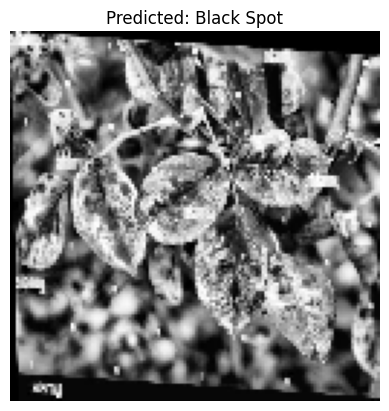

The image is classified as: Black Spot


In [42]:
# Function to classify a single image
def classify_image(image_path, class_names, model):
    img = tf.keras.preprocessing.image.load_img(image_path, target_size=(128, 128))
    img_array = tf.keras.preprocessing.image.img_to_array(img) / 255.0
    img_array = tf.expand_dims(img_array, axis=0)  # Add batch dimension
    prediction = model.predict(img_array)
    predicted_class = tf.argmax(prediction, axis=1).numpy()[0]
    
    plt.imshow(img)
    plt.title(f"Predicted: {class_names[predicted_class]}")
    plt.axis('off')
    plt.show()
    print(f"The image is classified as: {class_names[predicted_class]}")

# Example usage for a single image
image_path = r"C:\Users\91971\plant_Leaf_disease_data\train\images\bs_001_jpg.rf.9dd8a93145520c0eaf46a8bf94ab833c.jpg"  
classify_image(image_path, class_names, model)